# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor

In [2]:
random_seed = 3746

## Data

In [3]:
DATA_PATH = '../data/'

X_train = pd.read_pickle(DATA_PATH + 'X_train.pkl')
y_train = pd.read_pickle(DATA_PATH + 'y_train.pkl')
X_test = pd.read_pickle(DATA_PATH + 'X_test.pkl')
y_test = pd.read_pickle(DATA_PATH + 'y_test.pkl')



# Modeling

## Linear Regression

In [4]:
linreg = LinearRegression()
mse = -cross_validate(linreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')['test_score'].mean()

rmse = np.sqrt(mse)
print(f'CV Score RMSE: {rmse}')

CV Score RMSE: 39.024082311971085


In [5]:
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f'Test set RMSE: {rmse}')

Test set RMSE: 39.01331077267323


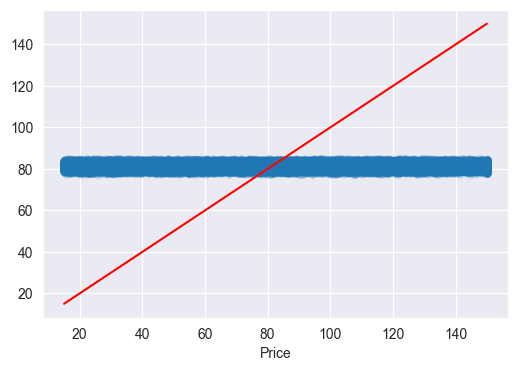

In [6]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.2, linewidth=0)
sns.lineplot(
    x=[y_test.min(), y_test.max()], 
    y=[y_test.min(), y_test.max()],
    color='red'
)
plt.show()

## LGBM Regressor

In [7]:
lgbm = LGBMRegressor(random_state=random_seed, verbose=-1)

mse = -cross_validate(lgbm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')['test_score'].mean()

rmse = np.sqrt(mse)
print(f'CV Score RMSE: {rmse}')

CV Score RMSE: 39.037647751502675


In [8]:
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f'Test set RMSE: {rmse}')

Test set RMSE: 39.027440325716796


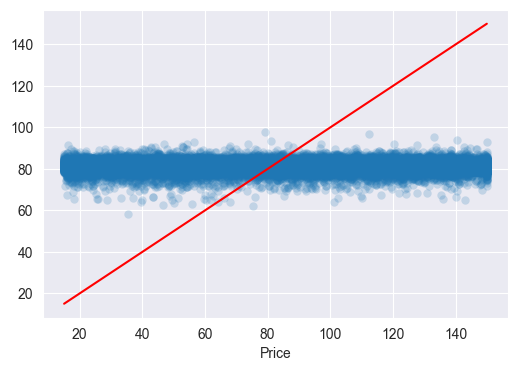

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.2, linewidth=0)
sns.lineplot(
    x=[y_test.min(), y_test.max()], 
    y=[y_test.min(), y_test.max()],
    color='red'
)
plt.show()

# Interpretation

## Feature Importances